In [5]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 5.0 MB/s eta 0:00:03
   - -------------------------------------- 0.3/11.0 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 9.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.0 MB 10.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 10.5 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 11.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 11.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/11.0 MB 12.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 11.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 11.3 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
from sklearn.preprocessing import LabelEncoder


In [2]:
def load_data(data_dir):
    X = []
    y = []
    for class_name in ['sipping_wine', 'smelling_wine', 'observing_wine']:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = Image.open(file_path).convert('L')  # Convert to grayscale
            image = image.resize((64, 64))  # Resize to a fixed size
            image = np.array(image).flatten()  # Flatten the image
            X.append(image)
            y.append(class_name)
    return np.array(X), np.array(y)

# Load dataset
data_dir = 'data'
X, y = load_data(data_dir)

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [4]:
# Train an SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)


SVC(kernel='linear', random_state=42)

In [5]:
# Predict on the test set
y_pred = svm.predict(X_test_pca)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7878787878787878
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      0.73      0.84        11
           2       0.69      0.82      0.75        11

    accuracy                           0.79        33
   macro avg       0.81      0.79      0.79        33
weighted avg       0.81      0.79      0.79        33



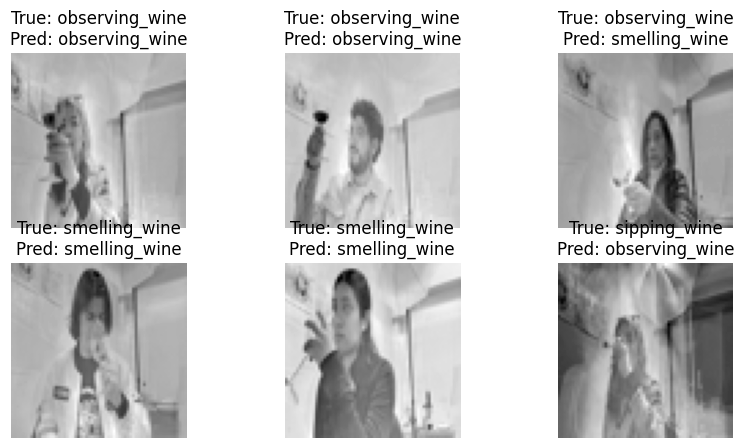

In [6]:
# Plot some test images with their predicted labels
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X_test[i].reshape(64, 64)  # Reshape image back to 64x64
    ax.imshow(image, cmap='gray')
    true_label = label_encoder.inverse_transform([y_test[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.show()


In [7]:
!pip install pandas openpyxl

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.6 MB 10.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.6 MB 6.9 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.6 MB 14.2 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.6 MB 10.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.6/11.6 MB 10.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.6 MB 16.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 14.4 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 14.4 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 14.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.5/11.6 MB 12.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.4/11.6 MB 14.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.4/11.6 MB 14.1 MB/s eta 0:0


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
